In [1]:
%matplotlib inline
from matplotlib import rc, rcParams, style
style.use('default')
rcParams['text.usetex'] = True
#rcParams['text.latex.unicode'] = True
myfont = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 14}
rc('font', **myfont)
#rc('font', **{'family': 'serif'})
rc('text', usetex=True)

In [2]:
import sys
module_path = '/home/g88077/Documents/2021/uqwind_phd/Central_Tendancy/central_tendancy_benchmark'
sys.path.append(str(module_path))

In [3]:
import numpy as np
import openturns as ot
import matplotlib.pyplot as plt
import ctbenchmark as ctb

# Gaussian peak problem description

In [4]:
problem = ctb.CentralTendencyGaussianPeakProblem2M()
function = problem.getFunction()
distribution = problem.getDistribution()
problem_name = problem.getName()

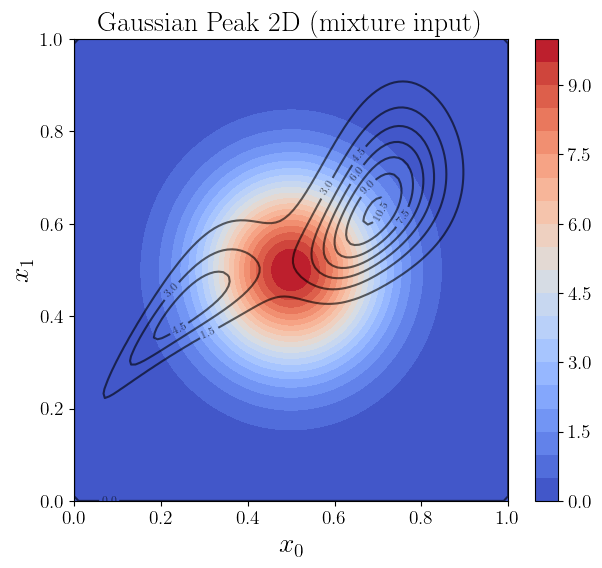

In [5]:
d = ctb.DrawFunctions()
fig = d.draw_2D_controur("Gaussian Peak 2D (mixture input)", function, distribution)
plt.savefig('res/gaussian_peak2M.pdf', bbox_inches='tight');

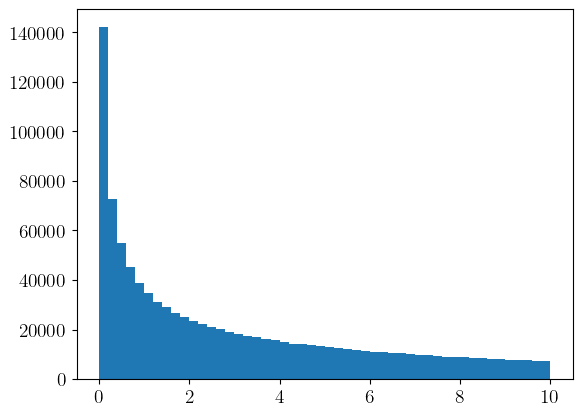

In [6]:
## Output pdf illustration
output_rv = problem.getRandomVector()
output_sample = output_rv.getSample(int(1e6))
plt.hist(np.array(output_sample).flatten(), 50);

## Kernel based sampling methods

In [46]:
import openturns as ot
levels = [3] * 2
# first component in [5,7], second in [6,9]
bounds = ot.Interval([0.] * 2, [1.] * 2)
myGrid = ot.Box(levels, bounds)
rg_sample = myGrid.generate()

In [47]:
len(rg_sample)

25

In [48]:
n = len(rg_sample)
doe_generator = ctb.CentralTendencyBenchmark()
candidate_points = doe_generator.generate_sample('sobol', 2**13, distribution, None)

In [49]:
kh_sample = doe_generator.generate_sample('kernel herding', n, None, candidate_points)
sp_sample = doe_generator.generate_sample('support points', n, None, candidate_points)

In [50]:
kh_weights = doe_generator.compute_bayesian_quadrature_weights(kh_sample, candidate_points)
sp_weights = doe_generator.compute_bayesian_quadrature_weights(sp_sample, candidate_points)
rg_weights = doe_generator.compute_bayesian_quadrature_weights(rg_sample, candidate_points)

In [51]:
sp_weights

array([ 0.017787  ,  0.03050885, -0.01804891,  0.05158862,  0.03459693,
        0.06208913,  0.03868595,  0.02766021,  0.05342087,  0.0446175 ,
        0.0754702 ,  0.01683232,  0.03963575,  0.05765317,  0.0046688 ,
        0.04453489,  0.04635865,  0.02283173,  0.02952831,  0.03686985,
        0.05465597,  0.05537632,  0.03826204,  0.05695992,  0.05684206])

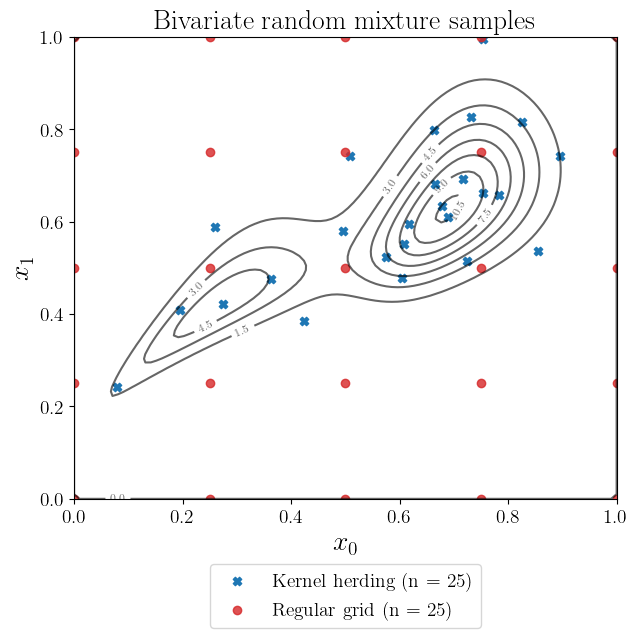

In [67]:
fig = d.draw_2D_controur('Bivariate random mixture samples', None, distribution)
plt.scatter(kh_sample[:, 0], kh_sample[:, 1], label='Kernel herding (n = {})'.format(n), marker='X', color='C0')
#plt.scatter(sp_sample[:, 0], sp_sample[:, 1], label='Greedy support points (n = {})'.format(n), marker='D', color='C1')
plt.scatter(rg_sample[:, 0], rg_sample[:, 1], label='Regular grid (n = {})'.format(n), marker='o', alpha=0.8, color='C3')
plt.legend(bbox_to_anchor=(0.5, -0.12), loc='upper center')
plt.savefig('res/mixture_sampling.pdf', bbox_inches='tight');

/home/g88077/miniconda3/envs/kh_env/lib/python3.10/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


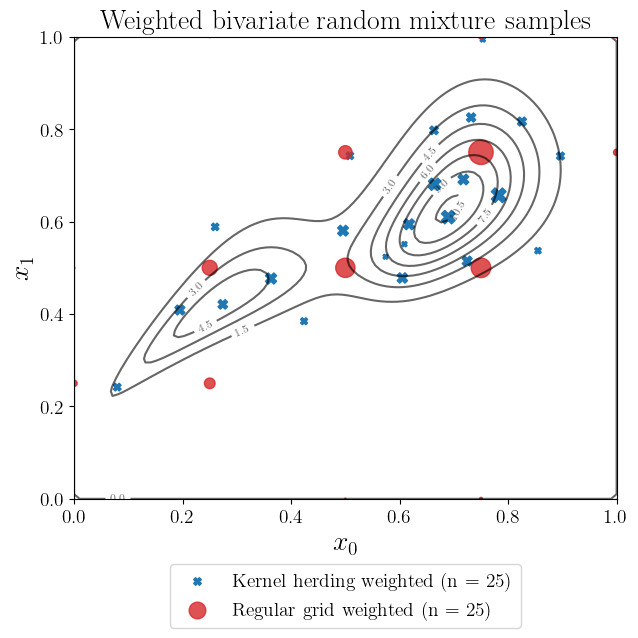

In [68]:
fig = d.draw_2D_controur('Weighted bivariate random mixture samples', None, distribution)
plt.scatter(kh_sample[:, 0], kh_sample[:, 1], label='Kernel herding weighted (n = {})'.format(n), marker='X', color='C0', s=kh_weights*1000)
#plt.scatter(sp_sample[:, 0], sp_sample[:, 1], label='Greedy support points (n = {})'.format(n), marker='D', color='C1', s=sp_weights*1000)
plt.scatter(rg_sample[:, 0], rg_sample[:, 1], label='Regular grid weighted (n = {})'.format(n), marker='o', alpha=0.8, color='C3', s=rg_weights*1000)
plt.legend(bbox_to_anchor=(0.5, -0.12), loc='upper center')
plt.savefig('res/weighted_mixture_sampling.pdf', bbox_inches='tight');

# Benchmark

In [13]:
x_bench_sizes = list(range(6, 20, 2)) + list(range(20, 50, 5)) + list(range(50, 260, 10))
my_methods = ['kernel herding', 'support points', 'sobol']
bench = ctb.CentralTendencyBenchmark(my_methods, x_bench_sizes)

In [14]:
df_benchmark = bench.run_benchmark([problem], candidate_points)
df_benchmark = df_benchmark.reset_index()
df_benchmark

START: problem=Gaussian Peak 2D (mixture input) | method=kernel herding
START: problem=Gaussian Peak 2D (mixture input) | method=support points
START: problem=Gaussian Peak 2D (mixture input) | method=sobol
DONE: problem=Gaussian Peak 2D (mixture input) | method=sobol
DONE: problem=Gaussian Peak 2D (mixture input) | method=support points
DONE: problem=Gaussian Peak 2D (mixture input) | method=kernel herding


,Problem,Method,Size,mu,m,m*,MMD,weights sum
0,Gaussian Peak 2D (mixture input),kernel herding,6,2.943982,2.771647,2.819279,NaN,0.947054
1,Gaussian Peak 2D (mixture input),kernel herding,8,2.943982,3.003531,2.968752,NaN,0.941035
2,Gaussian Peak 2D (mixture input),kernel herding,10,2.943982,2.706469,2.963781,NaN,0.96918
3,Gaussian Peak 2D (mixture input),kernel herding,12,2.943982,2.895628,2.946054,NaN,0.974565
4,Gaussian Peak 2D (mixture input),kernel herding,14,2.943982,2.694406,2.924827,NaN,0.983469
...,...,...,...,...,...,...,...,...
97,Gaussian Peak 2D (mixture input),support points,210,2.943982,2.969053,2.944052,NaN,0.99877
98,Gaussian Peak 2D (mixture input),support points,220,2.943982,2.957374,2.944048,NaN,0.998735
99,Gaussian Peak 2D (mixture input),support points,230,2.943982,2.948068,2.944167,NaN,0.998857
100,Gaussian Peak 2D (mixture input),support points,240,2.943982,2.947772,2.944178,NaN,0.999014


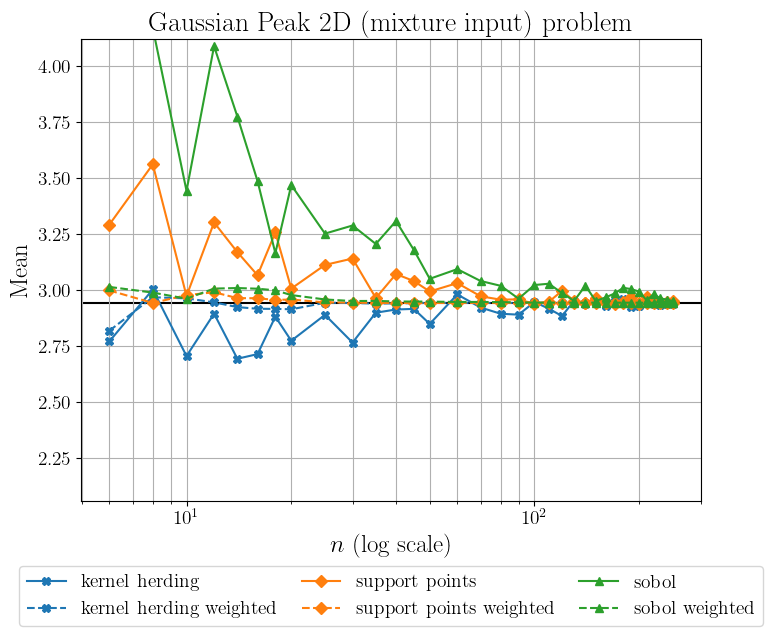

In [22]:
sfile = 'res/{}_convergence.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=my_methods, save_file=sfile);